# Preliminary analysis of collected data

## import libraries

In [85]:
# !pip install pandas
import pandas as pd
import json
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## read CSVs to dataframes

In [43]:
# news_media_basic_data

news_media_basic_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/news_media_twitter_username.csv')
news_media_basic_data.head()

,news_media,twitter_username,us_or_foreign,general_or_political
0,ABC News,ABC,US,General
1,ABC News,ABCPolitics,US,Political
2,ABC News,ABCNewsLive,US,General
3,BBC News,BBCWorld,Foreign,General
4,BBC News,BBCBreaking,Foreign,General


In [3]:
# twitter_user_details_data

twitter_user_details_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_user_details.csv')
twitter_user_details_data.head()

,user_id,user_name,user_username,user_created_at,user_location,user_protected,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified
0,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,17637543,486,392806,66090,True
1,16815644,ABC News Politics,ABCPolitics,2008-10-16 22:43:16+00:00,"Washington, DC",False,1079082,473,192649,8493,True
2,384438102,ABC News Live,ABCNewsLive,2011-10-03 17:47:38+00:00,NaN,False,95939,242,36702,2238,True
3,742143,BBC News (World),BBCWorld,2007-02-01 07:44:29+00:00,"London, UK",False,37686088,18,349672,132449,True
4,5402612,BBC Breaking News,BBCBreaking,2007-04-22 14:42:37+00:00,"London, UK",False,50643440,3,38172,147688,True


In [44]:
# twitter_users_tweets_2022_july_data

twitter_users_tweets_2022_july_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_users_tweets_2022_july.csv')
twitter_users_tweets_2022_july_data.head()

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,tweet_like_count,tweet_quote_count,tweet_referenced_tweets
0,1553892491962843136,Smokers and vapers are more likely to have a s...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-31 23:56:54+00:00,"{'urls': [{'start': 111, 'end': 134, 'url': 'h...",NaN,en,59,43,144,16,NaN
1,1553886764930138122,Gun manufacturers have made more than $1 billi...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-31 23:34:09+00:00,"{'urls': [{'start': 214, 'end': 237, 'url': 'h...",NaN,en,82,388,187,65,NaN
2,1553880276702560256,Misinformation and stigma may be holding back ...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-31 23:08:22+00:00,"{'urls': [{'start': 69, 'end': 92, 'url': 'htt...",NaN,en,24,39,46,3,NaN
3,1553872564820361222,Rising concern over the impact of a potential ...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-31 22:37:43+00:00,"{'annotations': [{'start': 90, 'end': 96, 'pro...",NaN,en,23,28,58,7,NaN
4,1553865859977908225,"At least 28 people have been confirmed dead, b...",28785486,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-07-31 22:11:05+00:00,"{'annotations': [{'start': 98, 'end': 109, 'pr...",NaN,en,83,38,204,6,NaN


## processing the data

In [75]:
# combine news_media_basic_data and twitter_user_details_data 
combined_news_media_basic_details = pd.merge(news_media_basic_data, twitter_user_details_data, left_on='twitter_username', right_on='user_username', how='left')

# combine combined_news_media_basic_details and tweets
combined_news_media_tweets_df = pd.merge(combined_news_media_basic_details, twitter_users_tweets_2022_july_data, left_on='user_id', right_on='tweet_author_id', how='left')

combined_news_media_tweets_df.head()

,news_media,twitter_username,us_or_foreign,general_or_political,user_id,user_name,user_username,user_created_at,user_location,user_protected,...,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,tweet_like_count,tweet_quote_count,tweet_referenced_tweets
0,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-31 23:56:54+00:00,"{'urls': [{'start': 111, 'end': 134, 'url': 'h...",NaN,en,59.0,43.0,144.0,16.0,NaN
1,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-31 23:34:09+00:00,"{'urls': [{'start': 214, 'end': 237, 'url': 'h...",NaN,en,82.0,388.0,187.0,65.0,NaN
2,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-31 23:08:22+00:00,"{'urls': [{'start': 69, 'end': 92, 'url': 'htt...",NaN,en,24.0,39.0,46.0,3.0,NaN
3,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-31 22:37:43+00:00,"{'annotations': [{'start': 90, 'end': 96, 'pro...",NaN,en,23.0,28.0,58.0,7.0,NaN
4,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-07-31 22:11:05+00:00,"{'annotations': [{'start': 98, 'end': 109, 'pr...",NaN,en,83.0,38.0,204.0,6.0,NaN


In [78]:
# format values

combined_news_media_tweets_df['tweet_created_at_date'] = pd.to_datetime(combined_news_media_tweets_df['tweet_created_at']).apply(lambda x: x.date())
combined_news_media_tweets_df.head()

,news_media,twitter_username,us_or_foreign,general_or_political,user_id,user_name,user_username,user_created_at,user_location,user_protected,...,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,tweet_like_count,tweet_quote_count,tweet_referenced_tweets,tweet_created_at_date
0,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,2022-07-31 23:56:54+00:00,"{'urls': [{'start': 111, 'end': 134, 'url': 'h...",NaN,en,59.0,43.0,144.0,16.0,NaN,2022-07-31
1,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,2022-07-31 23:34:09+00:00,"{'urls': [{'start': 214, 'end': 237, 'url': 'h...",NaN,en,82.0,388.0,187.0,65.0,NaN,2022-07-31
2,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,2022-07-31 23:08:22+00:00,"{'urls': [{'start': 69, 'end': 92, 'url': 'htt...",NaN,en,24.0,39.0,46.0,3.0,NaN,2022-07-31
3,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,2022-07-31 22:37:43+00:00,"{'annotations': [{'start': 90, 'end': 96, 'pro...",NaN,en,23.0,28.0,58.0,7.0,NaN,2022-07-31
4,ABC News,ABC,US,General,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,...,2022-07-31 22:11:05+00:00,"{'annotations': [{'start': 98, 'end': 109, 'pr...",NaN,en,83.0,38.0,204.0,6.0,NaN,2022-07-31


## analyse combined data

In [79]:
# count total tweet and tweeted date per news media
analysis_1 = combined_news_media_tweets_df.groupby(['user_id','user_name','us_or_foreign','general_or_political'])['tweet_id','tweet_created_at_date'].nunique().add_prefix('count_').reset_index()

# calculate average tweet per day
analysis_1['average_tweet_per_day'] = round(analysis_1['count_tweet_id']/31,2)

# combined_tweets_2022_july_df.groupby(['user_id','user_name']).apply(lambda x: round(x['tweet_id'].nunique()/31)).reset_index(name ='Average Tweet per Day')
analysis_1

/var/folders/kp/8gnd6lcn7y7df3py0t769c2r0000gn/T/ipykernel_788/939208662.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  analysis_1 = combined_news_media_tweets_df.groupby(['user_id','user_name','us_or_foreign','general_or_political'])['tweet_id','tweet_created_at_date'].nunique().add_prefix('count_').reset_index()


,user_id,user_name,us_or_foreign,general_or_political,count_tweet_id,count_tweet_created_at_date,average_tweet_per_day
0,428333,CNN Breaking News,US,General,133,30,4.29
1,612473,BBC News (UK),Foreign,General,2453,31,79.13
2,742143,BBC News (World),Foreign,General,1288,31,41.55
3,759251,CNN,US,General,2413,31,77.84
4,807095,The New York Times,US,General,2614,26,84.32
5,1367531,Fox News,US,General,1790,8,57.74
6,2467791,The Washington Post,US,General,2487,24,80.23
7,2836421,MSNBC,US,General,1802,31,58.13
8,3108351,The Wall Street Journal,US,General,2709,30,87.39
9,5392522,NPR,US,General,1310,31,42.26


In [15]:
combined_tweets_2022_july_piv1 = combined_tweets_2022_july_df.pivot_table(index=['tweet_created_at_date'], columns='user_name', 
values='tweet_id', aggfunc='nunique', fill_value=0)
combined_tweets_2022_july_piv1

user_name,ABC News,ABC News Live,ABC News Politics,BBC Breaking News,BBC News (UK),BBC News (World),BBC North America,CBS News,CBS News Politics,CBS News Poll,...,NPR,NPR Politics,NYT Politics,Sky News,The New York Times,The Wall Street Journal,The Washington Post,USA TODAY,USA TODAY Politics,euronews
tweet_created_at_date,,,,,,,,,,,,,,,,,,,,,
2022-07-01,76,19,3,2,90,48,5,0,3,1,...,52,28,18,0,0,0,0,77,27,34
2022-07-02,63,3,2,0,56,28,2,0,0,0,...,52,9,17,0,0,27,0,36,8,15
2022-07-03,70,0,36,2,70,25,1,0,1,0,...,30,1,6,0,0,86,0,44,6,16
2022-07-04,78,37,21,5,100,60,3,0,0,0,...,40,3,0,0,0,94,0,38,13,30
2022-07-05,80,17,41,6,114,50,7,0,0,0,...,48,23,16,0,0,96,0,78,15,36
2022-07-06,93,20,44,4,125,42,4,0,2,0,...,46,25,19,0,59,102,0,72,18,37
2022-07-07,87,22,47,6,111,58,8,105,0,0,...,54,16,22,0,116,96,0,76,23,37
2022-07-08,106,14,19,5,90,48,7,128,6,0,...,55,31,20,0,107,96,12,78,18,44
2022-07-09,78,3,0,2,53,22,2,62,0,0,...,29,5,14,0,96,86,58,38,8,17


Text(0, 0.5, 'Tweets')

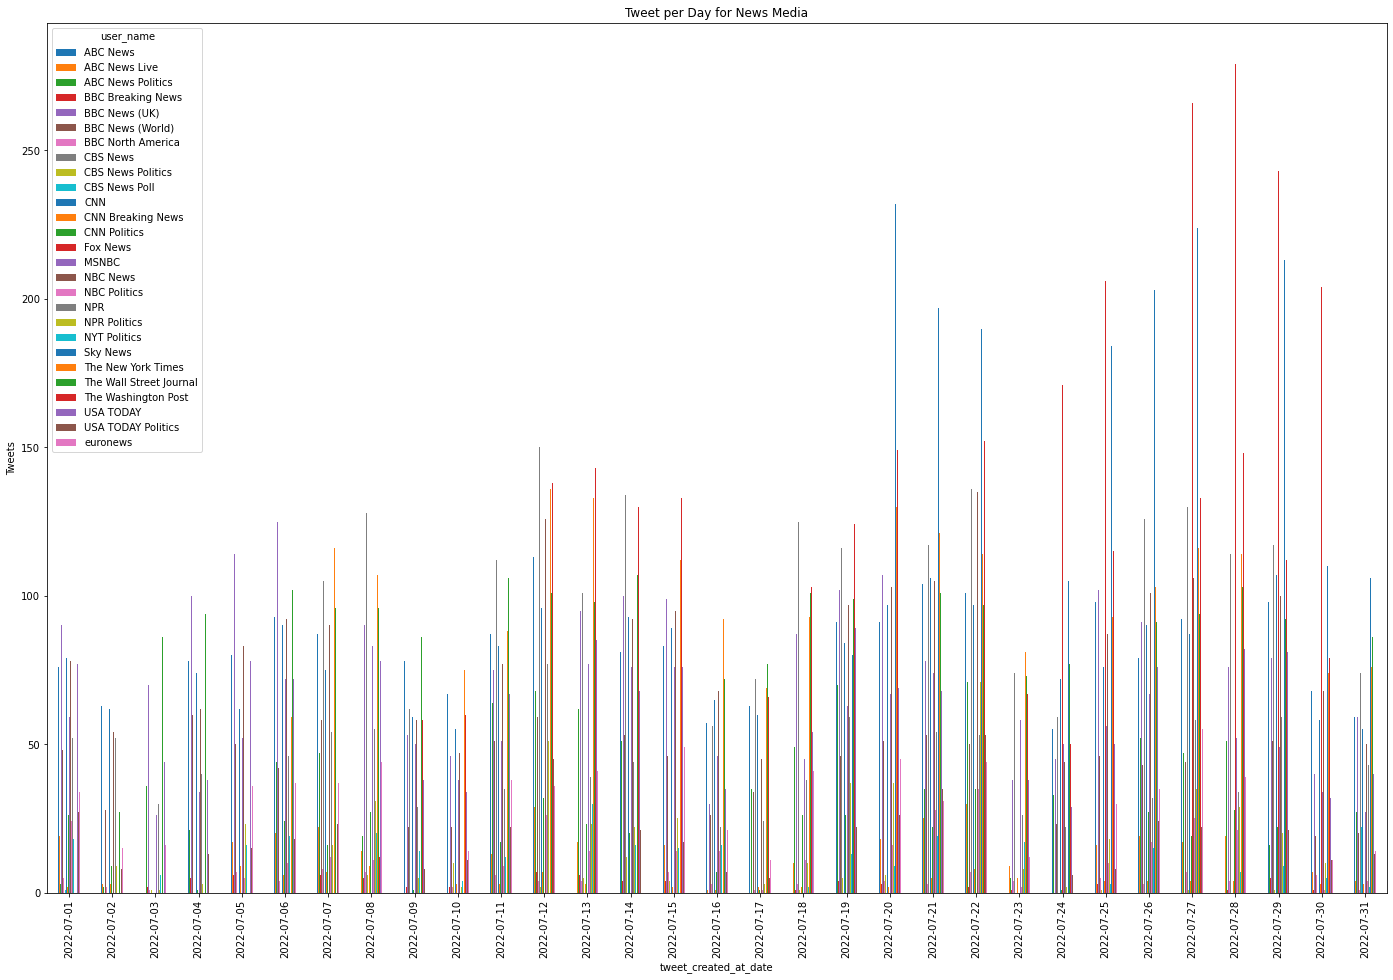

In [16]:
combined_tweets_2022_july_piv1.plot(kind='bar',figsize=(24,16))
plt.title("Tweet per Day for News Media")
plt.xlabel("tweet_created_at_date")
plt.ylabel("Tweets")

<AxesSubplot:xlabel='general_or_political', ylabel='average_tweet_per_day'>

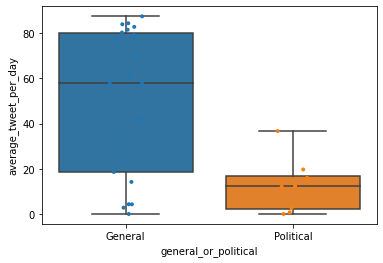

In [88]:
# tweet per day

sns.boxplot(x="general_or_political", y="average_tweet_per_day", data=analysis_1)
sns.stripplot(x="general_or_political", y="average_tweet_per_day", data=analysis_1,
              size=4, jitter=True, edgecolor="gray")